<a href="https://colab.research.google.com/github/yashb98/90Days_Machine_learinng/blob/main/California_Housing_(ML_Project_1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project Goal : California Housing dataset

The goal of this project is to predict the median house value in California districts based on various features like median income, house age, and location. This is a classic regression problem, where we predict a continuous numerical value


## Step 1: Import Libraries

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

#### This first step is the foundation of any data science project. You're importing all the necessary tools and functions into your environment.

1. **numpy and pandas:** These are the workhorses for data manipulation and
numerical operations. pandas is used to work with DataFrames (like spreadsheets in Python), and numpy is for efficient array computations.

2. **sklearn:** This is Scikit-learn, the primary machine learning library in Python. You've imported specific modules for:

3. **Loading the dataset** (fetch_california_housing).

4. **Splitting the data** (train_test_split) and performing hyperparameter tuning (GridSearchCV).

5. **Preprocessing the data** (StandardScaler).

6. **Implementing the different regression models** (LinearRegression, Ridge, etc.).

7. **Evaluating model performance** (mean_squared_error, r2_score).

8. **matplotlib and seaborn:** These are for data visualization, which is crucial for understanding data and model results.



## Step 2: Load the California Housing Dataset

In [2]:
housing = fetch_california_housing(as_frame = True)
df = housing.frame
print(df.head)
print(df.info())

<bound method NDFrame.head of        MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0      8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1      8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2      7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3      5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4      3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   
...       ...       ...       ...        ...         ...       ...       ...   
20635  1.5603      25.0  5.045455   1.133333       845.0  2.560606     39.48   
20636  2.5568      18.0  6.114035   1.315789       356.0  3.122807     39.49   
20637  1.7000      17.0  5.205543   1.120092      1007.0  2.325635     39.43   
20638  1.8672      18.0  5.329513   1.171920       741.0  2.123209     39.43   
20639  2.3886      16.0  5.254717   1.162264      1387.0  2.616981     39.37   

       Lo

#### Here, you load the dataset and perform an initial inspection. This is a critical first look to understand the data's structure, types, and to check for obvious issues like missing values.

1. fetch_california_housing(as_frame=True): This command loads the dataset directly from Scikit-learn and formats it as a pandas DataFrame, which is very convenient.

2. df.head(): Shows the first 5 rows, giving you a feel for the feature values and the target variable (MedHouseVal).

3. df.info(): Provides a concise summary. You can see there are 20,640 entries and 9 columns. Crucially, it shows "Non-Null Count" for all columns is 20,640, meaning there are no missing values to handle. All data types are float64, which is perfect for regression models.

The target variable, MedHouseVal, is the median house value in units of 100,000 dollars. So a value of 4.526 means a median value of 452,600 dollars.

#### This dataset contains:

* Feature(X): 8 Numerical features  (MedInc,
HouseAge, AveRooms, AveBedrms, Population, AveOccup, Latitude, Longitude)

* Target(y): MedHouseVal - The median house value (in 100,000 USD)

## Step 3: Split Data

In [3]:
X = df.drop("MedHouseVal", axis = 1)
y = df["MedHouseVal"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


#### This is one of the most important steps in creating a valid machine learning model. You are splitting your data to simulate a real-world scenario where you would train your model on historical data and then test its performance on new, unseen data.

1. Features (X) and Target (y): You correctly separate the dataset into X (the features or independent variables used to make a prediction) and y (the target or dependent variable you are trying to predict).

2. train_test_split:

    **Why split?** You train the model on the _train data and then evaluate its performance on the _test data. This prevents overfitting, a situation where the model memorizes the training data perfectly but fails to generalize to new data.

3. test_size=0.2: This reserves 20% of your data for the final test set, leaving 80% for training. This is a common and good split ratio.

4. random_state=42: This ensures that the split is reproducible. Every time you run this code, you will get the exact same split, which is essential for consistent results and debugging.

## Step 4: Standardise the Features

Regularization models are sensitive to feature scale - **Always Standardise** your data


In [4]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


### Why Standardise?
Linear models, especially those with regularization (Ridge, Lasso, ElasticNet), are sensitive to the scale of the features. A feature with a large range of values (e.g., Population) might dominate the model's cost function, causing its coefficient to be disproportionately weighted compared to a feature with a small range (e.g., AveRooms). Standardization rescales each feature to have a mean of 0 and a standard deviation of 1, putting all features on a common scale.

1. **fit_transform vs. transform:**

    You use fit_transform(X_train) on the training data. The fit part calculates the mean and standard deviation for each feature in the training set. The transform part then applies this scaling.

    You use only transform(X_test) on the test data. This is crucial! You are applying the scaling parameters learned from the training data to the test data. This prevents data leakage, where information from the test set "leaks" into the training process, giving an overly optimistic evaluation. You must always treat the test set as unseen data.

## Step 5: Train Models

In this step, you train four different linear models. Let's cover the theory first.

**Evaluation Metrics**

1. **R² Score (Coefficient of Determination):** This metric indicates the proportion of the variance in the target variable that is predictable from the features. An R² of 0.57 means your model explains 57% of the variability in house prices. A score of 1.0 is a perfect prediction, while 0.0 means the model is no better than just predicting the average house price.

2. **RMSE (Root Mean Squared Error):** This is the square root of the average of the squared differences between the predicted and actual values. It's a measure of the average magnitude of the error and is in the same units as the target variable. For this dataset, an RMSE of 0.745 means your model's predictions are, on average, off by about $74,500. A lower RMSE is always better.

### 1. Linear Regression

This is the simplest regression model. It finds the optimal coefficients for each feature to fit a straight line (or hyperplane in multiple dimensions) to the data. It does this by minimizing the sum of squared errors (the difference between the predicted and actual values), a method called Ordinary Least Squares (OLS). It's great as a baseline but can be prone to overfitting if you have many features.

In [5]:
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

y_pred_lr = lr.predict(X_test_scaled)

print("Linear Regression: ")
print("R2: ", r2_score(y_test, y_pred_lr))
print("RMSE: ", np.sqrt(mean_squared_error(y_test, y_pred_lr)))

Linear Regression: 
R2:  0.575787706032451
RMSE:  0.7455813830127763


### 2. Ridge Regression (L2 Regularization)

**Ridge Regression** is an extension of linear regression that adds a regularization term to the cost function. Specifically, it adds the "L2 norm" (sum of the squared coefficients). This penalty term forces the model to keep the coefficients small, which helps to reduce model complexity and prevent overfitting. The alpha parameter controls the strength of this penalty. Ridge shrinks coefficients towards zero but never makes them exactly zero.

In [6]:
ridge = Ridge(alpha=0.1)
ridge.fit(X_train_scaled, y_train)
y_pred_ridge= ridge.predict(X_test_scaled)

print("Ridge Regression: ")
print("R2: ", r2_score(y_test, y_pred_ridge))
print("RMSE: ", np.sqrt(mean_squared_error(y_test, y_pred_ridge)))

Ridge Regression: 
R2:  0.5757905180002312
RMSE:  0.7455789118982769


### 3. Lasso Regularization (L1 Regularization)




 **Lasso (Least Absolute Shrinkage and Selection Operator)** is similar to Ridge, but it adds the "L1 norm" (sum of the absolute values of the coefficients) as its penalty. The key difference is that this L1 penalty can shrink some feature coefficients all the way to zero. This makes Lasso incredibly useful for automatic feature selection, as it effectively tells you which features are not important for the prediction.

In [7]:
lasso = Lasso(alpha=0.001)
lasso.fit(X_train_scaled, y_train)
y_pred_lasso = lasso.predict(X_test_scaled)

print("Lasso Regression:")
print("R2: ", r2_score(y_test, y_pred_lasso))
print("RSME: ", np.sqrt(mean_squared_error(y_test, y_pred_lasso)))

Lasso Regression:
R2:  0.5768562568705682
RSME:  0.7446417662764214


### 4. Elastic Net (L1 + L2 Regularization)

**Elastic Net** is a hybrid of Ridge and Lasso. It includes both the L1 and L2 penalty terms in its cost function. This is useful because Lasso can sometimes be erratic if features are highly correlated, whereas Ridge handles this better. Elastic Net gives you the best of both worlds: it can perform feature selection like Lasso while handling correlated features robustly like Ridge. The l1_ratio parameter controls the mix between the two penalties.

In [8]:
elastic = ElasticNet(alpha=0.001, l1_ratio=0.9)
elastic.fit(X_train_scaled, y_train)
y_pred_elastic = elastic.predict(X_test_scaled)

print("Elastic Net Regression:")
print("R2: ", r2_score(y_test, y_pred_elastic))
print("RSME: ", np.sqrt(mean_squared_error(y_test, y_pred_elastic)))

Elastic Net Regression:
R2:  0.5767935612793467
RSME:  0.7446969295954571


## Step 6: Hyperparameter Tuning (Grid Search)

We will tune the regularization parameter alpha (and l1_ratio for ElasticNet)

In [9]:
ridge_params = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100]}
lasso_params = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100 ]}
elastic_params = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100], 'l1_ratio': [0.1, 0.3, 0.5, 0.7, 0.9]}

ridge_grid = GridSearchCV(Ridge(), ridge_params, cv=5, scoring='neg_mean_squared_error')
lasso_grid = GridSearchCV(Lasso(max_iter=10000), lasso_params, cv=5, scoring='neg_mean_squared_error')
elastic_grid = GridSearchCV(ElasticNet(max_iter=10000), elastic_params, cv=5, scoring='neg_mean_squared_error')

ridge_grid.fit(X_train_scaled, y_train)
lasso_grid.fit(X_train_scaled, y_train)
elastic_grid.fit(X_train_scaled, y_train)

print("Best Ridge alpha: ", ridge_grid.best_params_)
print("Best Lasso alpha: ", lasso_grid.best_params_)
print("Best ElasticNet parameters: ", elastic_grid.best_params_)


Best Ridge alpha:  {'alpha': 0.1}
Best Lasso alpha:  {'alpha': 0.001}
Best ElasticNet parameters:  {'alpha': 0.001, 'l1_ratio': 0.9}


#### This is a systematic way to find the best settings for your models.

**Hyperparameter Tuning with GridSearchCV**

1. **Hyperparameters:** These are settings you choose before training a model, like alpha in Ridge/Lasso or l1_ratio in ElasticNet. They are not learned from the data like the model's coefficients.

2. **Grid Search:** You define a "grid" of possible hyperparameter values (e.g., alpha: [0.001, 0.01, 1, 100]). GridSearchCV then exhaustively tries every combination.

3. **Cross-Validation (cv=5):** For each combination, it performs 5-fold cross-validation. The training data is split into 5 "folds." The model is trained on 4 folds and validated on the 5th, and this process is repeated 5 times, with each fold being the validation set once. The performance metric is then averaged across the 5 folds. This gives a much more robust performance estimate than a single train/validation split.

4. **scoring='neg_mean_squared_error':** GridSearchCV aims to maximize a score. Since we want to minimize error (like MSE), Scikit-learn uses "negative mean squared error," where a larger number (i.e., closer to zero) is better.

## Step 7: Compare Model Performance

Let's collect the results:


In [10]:
models = ['Linear', 'Ridge', 'Lasso', 'ElasticNet']
r2_scores = [
    r2_score(y_test, y_pred_lr),
    r2_score(y_test, y_pred_ridge),
    r2_score(y_test, y_pred_lasso),
    r2_score(y_test, y_pred_elastic)
]

rmse_score = [
    np.sqrt(mean_squared_error(y_test, y_pred_lr)),
    np.sqrt(mean_squared_error(y_test, y_pred_ridge)),
    np.sqrt(mean_squared_error(y_test, y_pred_lasso)),
    np.sqrt(mean_squared_error(y_test, y_pred_elastic))
]

results = pd.DataFrame({
    'Model': models,
    'R2 Score': r2_scores,
    'RMSE': rmse_score
})

print(results)

        Model  R2 Score      RMSE
0      Linear  0.575788  0.745581
1       Ridge  0.575791  0.745579
2       Lasso  0.576856  0.744642
3  ElasticNet  0.576794  0.744697


## Step 8: Feature Engineering

Let's create some new features that might be helpful for the models:
- `MedInc_HouseAge`: Interaction between median income and house age.
- `AveRooms_AveOccup`: Ratio of average rooms to average occupancy.
- `Distance_from_center`: A measure of distance from a central point (can be calculated based on latitude and longitude).

In [11]:
# --- Replace the code in the cell for Step 8 with this ---

# Calculate the center of the data based on latitude and longitude
center_lat = df['Latitude'].mean()
center_lon = df['Longitude'].mean()

# Function to calculate distance from the center
def distance_from_center(row):
    return np.sqrt((row['Latitude'] - center_lat)**2 + (row['Longitude'] - center_lon)**2)

# Apply feature engineering to both training and test sets
X_train_engineered = X_train.copy()
X_test_engineered = X_test.copy()

X_train_engineered['MedInc_HouseAge'] = X_train_engineered['MedInc'] * X_train_engineered['HouseAge']
X_test_engineered['MedInc_HouseAge'] = X_test_engineered['MedInc'] * X_test_engineered['HouseAge']


# Calculate the ratio and immediately handle potential division by zero
X_train_engineered['AveRooms_AveOccup'] = X_train_engineered['AveRooms'] / X_train_engineered['AveOccup']
X_test_engineered['AveRooms_AveOccup'] = X_test_engineered['AveRooms'] / X_test_engineered['AveOccup']
# Replace any infinite values that result from division by zero with 0
X_train_engineered.replace([np.inf, -np.inf], 0, inplace=True)
X_test_engineered.replace([np.inf, -np.inf], 0, inplace=True)


X_train_engineered['Distance_from_center'] = X_train_engineered.apply(distance_from_center, axis=1)
X_test_engineered['Distance_from_center'] = X_test_engineered.apply(distance_from_center, axis=1)

display(X_train_engineered.head())
display(X_test_engineered.head())

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedInc_HouseAge,AveRooms_AveOccup,Distance_from_center
14196,3.2596,33.0,5.017657,1.006421,2300.0,3.691814,32.71,-117.03,107.5668,1.359130,3.871353
8267,3.8125,49.0,4.473545,1.041005,1314.0,1.738095,33.77,-118.16,186.8125,2.573820,2.335336
17445,4.1563,4.0,5.645833,0.985119,915.0,2.723214,34.66,-120.48,16.6252,2.073224,1.331598
14265,1.9425,36.0,4.002817,1.033803,1418.0,3.994366,32.69,-117.11,69.9300,1.002116,3.834670
2271,3.5542,43.0,6.268421,1.134211,874.0,2.300000,36.78,-119.80,152.8306,2.725400,1.171007


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedInc_HouseAge,AveRooms_AveOccup,Distance_from_center
20046,1.6812,25.0,4.192201,1.022284,1392.0,3.877437,36.06,-119.01,42.0300,1.081178,0.704678
3024,2.5313,30.0,5.039384,1.193493,1565.0,2.679795,35.14,-119.46,75.9390,1.880511,0.503947
15663,3.4801,52.0,3.977155,1.185877,1310.0,1.360332,37.80,-122.44,180.9652,2.923664,3.597141
20484,5.7376,17.0,6.163636,1.020202,1705.0,3.444444,34.28,-118.72,97.5392,1.789443,1.596724
9814,3.7250,34.0,5.492991,1.028037,1063.0,2.483645,36.62,-121.93,126.6500,2.211665,2.558791


#### This is an excellent demonstration of how to improve model performance beyond just tuning. Feature engineering is often the most impactful part of a project.

#### **Feature Engineering**
This is the art and science of creating new, more informative features from the existing data. A good engineered feature can capture a complex relationship that the model might otherwise miss.

Your New Features:

**MedInc_HouseAge:** An interaction term. This could capture the idea that the effect of income on house price might differ depending on the age of the housing stock in the area.

**AveRooms_AveOccup:** A ratio. This might be a better proxy for spaciousness than either feature alone. A high number of rooms with low occupancy might indicate a more desirable, larger home.

**Distance_from_center:** A spatial feature. This is a great idea, as house prices are often strongly correlated with location and proximity to major city centers.


By creating these features, you are explicitly giving the model information that was only implicitly present in the original data.

## Step 9: Standardise Engineered Features

We need to standardise the newly engineered features as regularization models are sensitive to feature scale.

In [12]:
scaler_engineered = StandardScaler()
X_train_engineered_scaled = scaler_engineered.fit_transform(X_train_engineered)
X_test_engineered_scaled = scaler_engineered.transform(X_test_engineered)

## Step 10: Train Models with Engineered Features

### 1. Linear Regression with Engineered Features

In [13]:
lr_engineered = LinearRegression()
lr_engineered.fit(X_train_engineered_scaled, y_train)

y_pred_lr_engineered = lr_engineered.predict(X_test_engineered_scaled)

print("Linear Regression with Engineered Features: ")
print("R2: ", r2_score(y_test, y_pred_lr_engineered))
print("RMSE: ", np.sqrt(mean_squared_error(y_test, y_pred_lr_engineered)))

Linear Regression with Engineered Features: 
R2:  0.6394692631290806
RMSE:  0.6873446839304572


### 2. Ridge Regression (L2 Regularization) with Engineered Features

In [14]:
ridge_engineered = Ridge(alpha=0.1) # Using the best alpha found earlier
ridge_engineered.fit(X_train_engineered_scaled, y_train)
y_pred_ridge_engineered = ridge_engineered.predict(X_test_engineered_scaled)

print("Ridge Regression with Engineered Features: ")
print("R2: ", r2_score(y_test, y_pred_ridge_engineered))
print("RMSE: ", np.sqrt(mean_squared_error(y_test, y_pred_ridge_engineered)))

Ridge Regression with Engineered Features: 
R2:  0.6394690712626955
RMSE:  0.6873448668251577


### 3. Lasso Regularization (L1 Regularization) with Engineered Features

In [15]:
lasso_engineered = Lasso(alpha=0.001) # Using the best alpha found earlier
lasso_engineered.fit(X_train_engineered_scaled, y_train)
y_pred_lasso_engineered = lasso_engineered.predict(X_test_engineered_scaled)

print("Lasso Regression with Engineered Features:")
print("R2: ", r2_score(y_test, y_pred_lasso_engineered))
print("RMSE: ", np.sqrt(mean_squared_error(y_test, y_pred_lasso_engineered)))

Lasso Regression with Engineered Features:
R2:  0.6396187283306781
RMSE:  0.6872021929427701


### 4. Elastic Net (L1 + L2 Regularization) with Engineered Features

In [16]:
elastic_engineered = ElasticNet(alpha=0.001, l1_ratio=0.9) # Using the best parameters found earlier
elastic_engineered.fit(X_train_engineered_scaled, y_train)
y_pred_elastic_engineered = elastic_engineered.predict(X_test_engineered_scaled)

print("Elastic Net Regression with Engineered Features:")
print("R2: ", r2_score(y_test, y_pred_elastic_engineered))
print("RMSE: ", np.sqrt(mean_squared_error(y_test, y_pred_elastic_engineered)))

Elastic Net Regression with Engineered Features:
R2:  0.6395997558310369
RMSE:  0.6872202818014189


## Step 11: Compare Model Performance with and without Engineered Features

In [17]:
models_engineered = ['Linear (Engineered)', 'Ridge (Engineered)', 'Lasso (Engineered)', 'ElasticNet (Engineered)']
r2_scores_engineered = [
    r2_score(y_test, y_pred_lr_engineered),
    r2_score(y_test, y_pred_ridge_engineered),
    r2_score(y_test, y_pred_lasso_engineered),
    r2_score(y_test, y_pred_elastic_engineered)
]

rmse_scores_engineered = [
    np.sqrt(mean_squared_error(y_test, y_pred_lr_engineered)),
    np.sqrt(mean_squared_error(y_test, y_pred_ridge_engineered)),
    np.sqrt(mean_squared_error(y_test, y_pred_lasso_engineered)),
    np.sqrt(mean_squared_error(y_test, y_pred_elastic_engineered))
]

results_engineered = pd.DataFrame({
    'Model': models_engineered,
    'R2 Score': r2_scores_engineered,
    'RMSE': rmse_scores_engineered
})

# Combine the results DataFrames for easier comparison
combined_results = pd.concat([results, results_engineered])

print("Model Performance Comparison (with and without Engineered Features):")
display(combined_results)

Model Performance Comparison (with and without Engineered Features):


,Model,R2 Score,RMSE
0,Linear,0.575788,0.745581
1,Ridge,0.575791,0.745579
2,Lasso,0.576856,0.744642
3,ElasticNet,0.576794,0.744697
0,Linear (Engineered),0.639469,0.687345
1,Ridge (Engineered),0.639469,0.687345
2,Lasso (Engineered),0.639619,0.687202
3,ElasticNet (Engineered),0.639600,0.687220


## Step 12: Visualize Model Performance Comparison

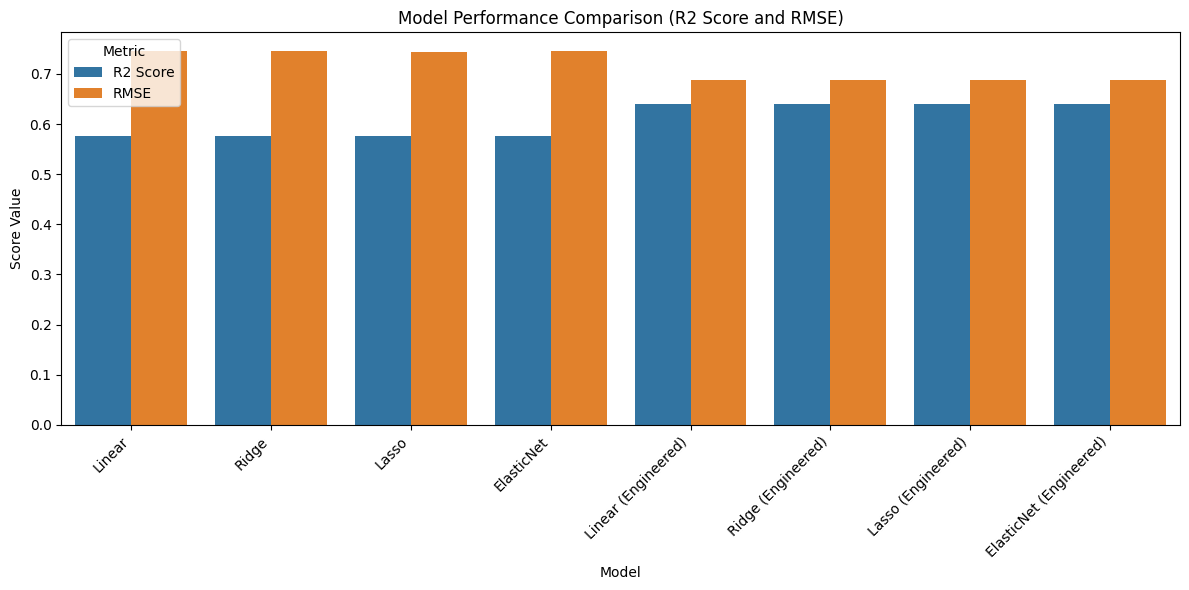

In [18]:
# The data for grouped bar plot
combined_results_melted = combined_results.melt(id_vars='Model', var_name='Metric', value_name='Score')

plt.figure(figsize=(12, 6))
sns.barplot(x='Model', y='Score', hue='Metric', data=combined_results_melted)
plt.title('Model Performance Comparison (R2 Score and RMSE)')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Score Value')
plt.tight_layout()
plt.show()

## Step 13 Advanced Feature Engineering

In this step, we will engineer even more sophisticated features based on the ideas from yesterday. The goal is to provide the models with more nuanced information that might be hidden in th data, potentially capturing non-linear trends and more detailed spatial relationships

### 1. Polynomial Features

**Polynomial features** are a way to expand your input features to capture nonlinear relationships between the input variables and the target variable.

Most **Machine learning models** (like **linear regression**) can only learn linear relationships, i.e., they fit a straight line (or a hyperplane in higher dimensions).

However, many real-world problems are nonlinear - the data might curve or twist in some way

We will create a squared term for **"MedInc"** to help teh model capture the likely non-linear relationship between income and house price.


In [35]:
# Make copies to work with for this advanced step
X_train_advanced = X_train_engineered.copy()
X_test_advanced = X_test_engineered.copy()

# 1. Create Piolynomial Features for MedInc
X_train_advanced['MedInc_sq'] = X_train_advanced['MedInc']**2
X_test_advanced['MedInc_sq'] = X_test_advanced['MedInc']**2

### 2. Advanced Spatial Features

Instead of using raw cordinated (latitude, longitude) directly - which are had for a model to interpret - we can engineer spatial features that describe how far each data point is from important locations.

For example:

*   Houses closer to San Francisco tend to be more expensive
*   Houses closer to Los Angeles might have different market characteristics

So, we compute:

*   Distance to LA
*   Distance to SF

and use those diostances as a new features in our dataset

**The Haversine Formula**
Since Earth is **"round"** (approximately spherical), we can't just use Eucledian distance (which assimes a flat surface).

The **Haversine formula** gives an accurate way to compute the great-circle distance between two points on a sphere given their latitude and longitude.


**Why not use Simple Euclidean Distance?**

*   1 degree of longitude represents different actual distances at different latitudes (due to Earth's curvature).
*   Haversine accounts for this curvature, giving more accurate results - especially when points are far apart (like Los Angeles to San Francisco)


In [36]:
from math import radians, sin, cos, sqrt, atan2

# Haversine distance function for accurate geographic distance

def haversine_distance(lat1, lon1, lat2, lon2):
  R = 6371.0  # Earth radius in Kilometers

  # Step 1: Convert the differences in latitude and longitude to radians
  dLat = radians(lat2 - lat1)
  dLon = radians(lon2-lon1)

  # Step 2: Convert the input latutudes themselves to radians
  ## (Trignometric functions like sin() and cos() expect radians, not degrees)
  lat1_rad = radians(lat1)
  lat2_rad = radians(lat2)

  # Step 3: Apply the Haversine Formula
  # The formula:
  # a = sin²(Δlat/2) + cos(lat1) * cos(lat2) * sin²(Δlon/2)
  a = sin(dLat/2)**2 + cos(lat1_rad) * cos(lat2_rad) * sin(dLon/2)**2

  # Step 4: Compute the angular distance in radians
  # c = 2 * atan2(√a, √(1−a))
  c = 2 * atan2(sqrt(a), sqrt(1-a))

  # Step 5: Convert the angular distance to a linear distance
  # Multiply by Earth's radius to get the distance in kilometers
  distance = R * c
  return distance

# Coordinates for major hubs
la_coords = (34.0522, -118.2437)  # Los Angeles
sf_coords = (37.7749, -122.4194)  # San Francisco

# Calculate distances for the training set
X_train_advanced['distance_to_la'] = X_train_advanced.apply(lambda row: haversine_distance(row['Latitude'], row['Longitude'], la_coords[0], la_coords[1]), axis=1)
X_train_advanced['distance_to_sf'] = X_train_advanced.apply(lambda row: haversine_distance(row['Latitude'], row['Longitude'], sf_coords[0], sf_coords[1]), axis=1)

# Calculate the distances for the test set
X_test_advanced['distance_to_la'] = X_train_advanced.apply(lambda row: haversine_distance(row['Latitude'], row['Longitude'], la_coords[0], la_coords[1]), axis=1)
X_test_advanced['distance_to_sf'] = X_train_advanced.apply(lambda row: haversine_distance(row['Latitude'], row['Longitude'], sf_coords[0], sf_coords[1]), axis=1)




### 3. Binning Continuous Variables

Now we will convert the continuous **HouseAge** feature into discrete categories. This can help the model find distinct patterns for new vs old houses. Since linear models can't handle test categories, we will then one-hot encode these new categories

**Binning** a continuous variable means turning a numeric column ( like HouseAge ) into a smaller number of **discrete categories**(bins), then typically encoding those categories into numeric columns (e.g. one-hot) so a model can use them. This is a common feature-engineering trick to help linear models capture nonlinear or piecewise relationships with the target.

**WHY BIN HouseAge?**
1. Capture  nonlinearity: A linear model assumes a straight line relatinship. If price jumps for new houses and then flattens, binning lets the model learn different intercepts/slopes per age-range
2. Handle local effects: Different marketing/maintainance regimes or policy thresholds may make certain age ranges behave differently
3. Interpretability: "New/middle/old" is a easier to interpret that a third-degree polynomial term
4. Reduce Noise: Binning can smooth noisy continuous measurements

Tradeoff: information loss (you compress a continuous variable) and higher dimensionality after one-hot encoding




In [49]:
# 3. Bin HouseAge into categories
# Let's try different bin boundaries
age_bins = [0, 10, 25, 40, 60]  # Adjusted bins for different age ranges
age_labels = ['Very New', 'New', 'Medium', 'Old'] # Adjusted labels

# Make copies to work with for this advanced step - Ensure .copy() is called
X_train_advanced = X_train_engineered.copy()
X_test_advanced = X_test_engineered.copy()

X_train_advanced['Age_cat'] = pd.cut(X_train_advanced['HouseAge'], bins=age_bins, labels=age_labels, include_lowest=True)
X_test_advanced['Age_cat'] = pd.cut(X_test_advanced['HouseAge'], bins=age_bins, labels=age_labels, include_lowest=True)

# One-hot encode the new categorical feature
# Keep all dummy variables this time
train_dummies = pd.get_dummies(X_train_advanced['Age_cat'], prefix='Age')
test_dummies = pd.get_dummies(X_test_advanced['Age_cat'], prefix='Age')

# Add the new dummy columns and drop the original categorical and numerical age columns
# Check if columns exist before dropping
cols_to_drop = ['Age_cat']
if 'HouseAge' in X_train_advanced.columns:
    cols_to_drop.append('HouseAge')

X_train_advanced = pd.concat([X_train_advanced.drop(cols_to_drop, axis=1), train_dummies], axis=1)
X_test_advanced = pd.concat([X_test_advanced.drop(cols_to_drop, axis=1), test_dummies], axis=1)


# Align columns to ensure test set has the same dummy variables as the train set
# Use fill_value=0 for categories not present in one set but present in the other
X_test_advanced = X_test_advanced.reindex(columns=X_train_advanced.columns, fill_value=0)


print("Advanced features added. Training data shape:", X_train_advanced.shape)
display(X_train_advanced.head())

Advanced features added. Training data shape: (16512, 14)


,MedInc,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedInc_HouseAge,AveRooms_AveOccup,Distance_from_center,Age_Very New,Age_New,Age_Medium,Age_Old
14196,3.2596,5.017657,1.006421,2300.0,3.691814,32.71,-117.03,107.5668,1.359130,3.871353,False,False,True,False
8267,3.8125,4.473545,1.041005,1314.0,1.738095,33.77,-118.16,186.8125,2.573820,2.335336,False,False,False,True
17445,4.1563,5.645833,0.985119,915.0,2.723214,34.66,-120.48,16.6252,2.073224,1.331598,True,False,False,False
14265,1.9425,4.002817,1.033803,1418.0,3.994366,32.69,-117.11,69.9300,1.002116,3.834670,False,False,True,False
2271,3.5542,6.268421,1.134211,874.0,2.300000,36.78,-119.80,152.8306,2.725400,1.171007,False,False,False,True


## Step 14: Standardise the Final feature Set and Re-train models on Advanced Features

With our new features added, we must re-run the standardization process. It's important to fit the scaler only on the final training data and then use it to transform both the training and test sets to prevent data leakage.

Now we repeat the model training process exactly as before , but this time using our most feature-rich dataset.



In [51]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# Define preprocessing steps (only imputation, scaling is done separately now)
preprocessor = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),   # Handle NaN values
])

# Define model pipelines
pipelines = {
    'Linear Regression': Pipeline([
        ('preprocess', preprocessor),
        ('model', LinearRegression())
    ]),
    'Ridge Regression': Pipeline([
        ('preprocess', preprocessor),
        ('model', Ridge(alpha=0.1))
    ]),
    'Lasso Regression': Pipeline([
        ('preprocess', preprocessor),
        ('model', Lasso(alpha=0.001))
    ]),
    'Elastic Net': Pipeline([
        ('preprocess', preprocessor),
        ('model', ElasticNet(alpha=0.001, l1_ratio=0.9))
    ])
}

# Train and evaluate all models
results = {}

for name, pipe in pipelines.items():
    # Train
    # Use the already scaled training data
    pipe.fit(X_train_advanced_scaled, y_train)

    # Predict
    # Use the already scaled test data
    y_pred = pipe.predict(X_test_advanced_scaled)

    # Evaluate
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)

    # Store RMSE and R2 in the results dictionary
    results[name] = {'RMSE': rmse, 'R²': r2}
    print(f"\n {name}")
    print(f"   RMSE: {rmse:.4f}")
    print(f"   R²: {r2:.4f}")


 Linear Regression
   RMSE: 0.6884
   R²: 0.6383

 Ridge Regression
   RMSE: 0.6884
   R²: 0.6383

 Lasso Regression
   RMSE: 0.6883
   R²: 0.6385

 Elastic Net
   RMSE: 0.6883
   R²: 0.6385


### Re-evaluating Advanced Features

Let's examine the new advanced features created in Step 13 to understand their characteristics and relationship with the target variable.

Descriptive statistics for advanced features:


,MedInc_sq,distance_to_la,distance_to_sf,MedHouseVal
count,16512.000000,16512.000000,16512.000000,16512.000000
mean,18.686369,270.644909,384.656279,2.071947
std,22.010476,248.048645,250.102818,1.156226
min,0.249900,0.419573,0.547401,0.149990
25%,6.587949,32.477075,115.524978,1.198000
50%,12.572698,174.535883,524.821172,1.798500
75%,22.783200,527.832765,583.712879,2.651250
max,225.003000,1018.262781,902.835126,5.000010



Correlation matrix including advanced features and target:


,MedInc_sq,distance_to_la,distance_to_sf,Age_Medium,Age_Old,MedHouseVal
MedInc_sq,1.000000,-0.052510,-0.020490,-0.007343,-0.051962,0.626669
distance_to_la,-0.052510,1.000000,-0.848412,-0.006187,-0.027496,-0.130220
distance_to_sf,-0.020490,-0.848412,1.000000,0.053150,-0.081446,-0.032113
Age_Medium,-0.007343,-0.006187,0.053150,1.000000,-0.710348,-0.031457
Age_Old,-0.051962,-0.027496,-0.081446,-0.710348,1.000000,0.075682
MedHouseVal,0.626669,-0.130220,-0.032113,-0.031457,0.075682,1.000000


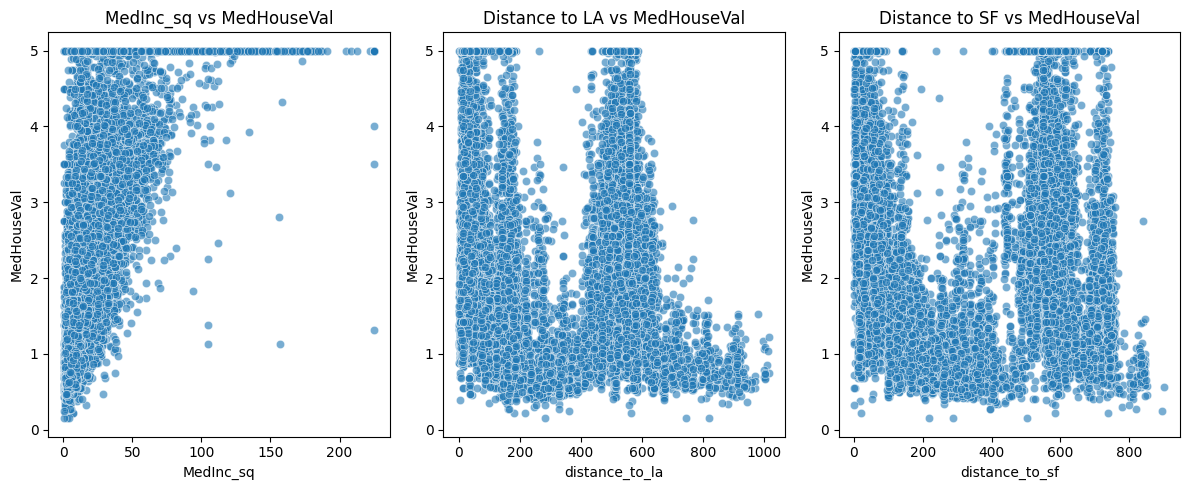

In [47]:
# Combine the engineered features with the target variable for analysis
X_train_advanced_with_target = X_train_advanced.copy()
X_train_advanced_with_target['MedHouseVal'] = y_train

# Display descriptive statistics for the new features
print("Descriptive statistics for advanced features:")
display(X_train_advanced_with_target[['MedInc_sq', 'distance_to_la', 'distance_to_sf', 'Age_Medium', 'Age_Old', 'MedHouseVal']].describe())

# Calculate and display the correlation matrix including the new features and target
print("\nCorrelation matrix including advanced features and target:")
display(X_train_advanced_with_target[['MedInc_sq', 'distance_to_la', 'distance_to_sf', 'Age_Medium', 'Age_Old', 'MedHouseVal']].corr())

# Visualize the relationship between new features and the target variable

# Scatter plot for polynomial feature (MedInc_sq vs MedHouseVal)
plt.figure(figsize=(12, 5))
plt.subplot(1, 3, 1)
sns.scatterplot(x='MedInc_sq', y='MedHouseVal', data=X_train_advanced_with_target, alpha=0.6)
plt.title('MedInc_sq vs MedHouseVal')

# Scatter plots for spatial features (distance to LA/SF vs MedHouseVal)
plt.subplot(1, 3, 2)
sns.scatterplot(x='distance_to_la', y='MedHouseVal', data=X_train_advanced_with_target, alpha=0.6)
plt.title('Distance to LA vs MedHouseVal')

plt.subplot(1, 3, 3)
sns.scatterplot(x='distance_to_sf', y='MedHouseVal', data=X_train_advanced_with_target, alpha=0.6)
plt.title('Distance to SF vs MedHouseVal')

plt.tight_layout()
plt.show()

# # Box plot for binned HouseAge categories vs MedHouseVal - Removed as Age_cat is dropped after one-hot encoding
# plt.figure(figsize=(6, 5))
# sns.boxplot(x='Age_cat', y='MedHouseVal', data=X_train_advanced_with_target.replace({'Age_Medium': 'Medium', 'Age_Old': 'Old'})) # Need to convert boolean dummies back for plotting easily
# plt.title('HouseAge Category vs MedHouseVal')
# plt.show()

## Step 14: Standardise the Final feature Set

With our new advanced features added, we must re-run the standardization process. It's important to fit the scaler only on the final training data and then use it to transform both the training and test sets to prevent data leakage.

In [50]:
# Standardize the updated advanced features
scaler_advanced = StandardScaler()
X_train_advanced_scaled = scaler_advanced.fit_transform(X_train_advanced)
X_test_advanced_scaled = scaler_advanced.transform(X_test_advanced)

print("Updated advanced features standardized.")

Updated advanced features standardized.


## Step 15: Final Performance Comparison

We will now create a final comparison table that includes the results from all three stages of our project: the baselne models, the models with initial engineered featutres, and the models with our new advanced features


In [52]:
# Collect results from the baseline models
baseline_results = pd.DataFrame({
    'Model': ['Linear (Baseline)', 'Ridge (Baseline)', 'Lasso (Baseline)', 'ElasticNet (Baseline)'],
    'R2 Score': r2_scores,
    'RMSE': rmse_score
})

# Collect results from the initial engineered models (already in combined_results)
initial_engineered_results = combined_results[combined_results['Model'].str.contains('Engineered')].copy()
initial_engineered_results['Model'] = initial_engineered_results['Model'].str.replace(' (Engineered)', ' (Initial Engineered)', regex=False)


# Collect results from the advanced engineered models (from the 'results' dictionary in the last training step)
advanced_engineered_results = pd.DataFrame({
    'Model': [f"{model_name} (Advanced Engineered)" for model_name in results.keys()],
    'R2 Score': [result['R²'] for result in results.values()],
    'RMSE': [result['RMSE'] for result in results.values()] # Corrected to use 'RMSE' key
})


# Combine all results DataFrames
final_results_df = pd.concat([baseline_results, initial_engineered_results, advanced_engineered_results], ignore_index=True)

print("Final Model Performance Comparison:")
display(final_results_df)

Final Model Performance Comparison:


,Model,R2 Score,RMSE
0,Linear (Baseline),0.575788,0.745581
1,Ridge (Baseline),0.575791,0.745579
2,Lasso (Baseline),0.576856,0.744642
3,ElasticNet (Baseline),0.576794,0.744697
4,Linear (Initial Engineered),0.639469,0.687345
5,Ridge (Initial Engineered),0.639469,0.687345
6,Lasso (Initial Engineered),0.639619,0.687202
7,ElasticNet (Initial Engineered),0.639600,0.687220
8,Linear Regression (Advanced Engineered),0.638334,0.688426
9,Ridge Regression (Advanced Engineered),0.638334,0.688426



## Step 16: Explore non-linear regression models to potentially improve model performance on the California Housing dataset.

1.  **Random Forest Regressor** is an ensemble learning method that works by building multiple decision trees during training and outputting the average prediction of the individual trees.

    *   **How it handles non-linearity:** Each individual decision tree can capture non-linear relationships by recursively splitting the data based on feature values. The combination of many diverse trees allows the Random Forest to model highly complex and non-linear patterns in the data.
    *   **Key characteristics:** It's robust to overfitting, can handle both numerical and categorical data (though we've already one-hot encoded), and provides a measure of feature importance.

2. **Gradient Boosting Regressor** is another powerful ensemble method that builds trees sequentially. Each new tree is trained to correct the errors made by the previous ones. It combines weak learners (typically shallow decision trees) into a single strong learner.

    *   **How it handles non-linearity:** By iteratively fitting new trees to the residuals (errors) of the previous predictions, Gradient Boosting can capture complex, non-linear relationships in a step-wise manner. It focuses more on correcting mispredictions, making it very effective.
    *   **Key characteristics:** Often achieves state-of-the-art results, but can be more prone to overfitting than Random Forests if not carefully tuned.


In [58]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

# Train Random Forest Regressor
rf_engineered = RandomForestRegressor(random_state=42)
rf_engineered.fit(X_train_engineered_scaled, y_train)

# Predict using Random Forest
y_pred_rf_engineered = rf_engineered.predict(X_test_engineered_scaled)

# Train Gradient Boosting Regressor
gb_engineered = GradientBoostingRegressor(random_state=42)
gb_engineered.fit(X_train_engineered_scaled, y_train)

# Predict using Gradient Boosting
y_pred_gb_engineered = gb_engineered.predict(X_test_engineered_scaled)


Evaluate the performance of the trained non-linear models using R2 and RMSE and display the results.



In [59]:
# Evaluate Random Forest
r2_rf_engineered = r2_score(y_test, y_pred_rf_engineered)
rmse_rf_engineered = np.sqrt(mean_squared_error(y_test, y_pred_rf_engineered))

print("Random Forest Regression with Initial Engineered Features:")
print(f"R2: {r2_rf_engineered:.4f}")
print(f"RMSE: {rmse_rf_engineered:.4f}")

# Evaluate Gradient Boosting
r2_gb_engineered = r2_score(y_test, y_pred_gb_engineered)
rmse_gb_engineered = np.sqrt(mean_squared_error(y_test, y_pred_gb_engineered))

print("\nGradient Boosting Regression with Initial Engineered Features:")
print(f"R2: {r2_gb_engineered:.4f}")
print(f"RMSE: {rmse_gb_engineered:.4f}")

Random Forest Regression with Initial Engineered Features:
R2: 0.8127
RMSE: 0.4954

Gradient Boosting Regression with Initial Engineered Features:
R2: 0.7880
RMSE: 0.5271


## Step 17: Hyperparameter tuning for non-linear models


Hyperparameter tuning for the non-linear models using technique like RandomizedSearchCV.

**RandomizedSearchCV** is a method in scikit-learn used for hyperparameter tuning of machine learning models.

Instead of trying all possible combinations of hyperparameters (like GridSearchCV), it randomly samples a fixed number of combinations from the hyperparameter space. This makes it much faster while still often finding near-optimal parameters.


In [61]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

# --- Random Forest Regressor ---
rf_params = {
    'n_estimators': [100, 150, 200],
    'max_depth': [10, 15, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2'],
    'bootstrap': [True]
}

rf_random = RandomizedSearchCV(
    RandomForestRegressor(random_state=42),
    rf_params,
    n_iter=15,
    cv=3,
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    verbose=2,
    random_state=42
)
rf_random.fit(X_train_engineered_scaled, y_train)
print("Best Random Forest parameters:", rf_random.best_params_)

# --- Gradient Boosting Regressor ---
gb_params = {
    'n_estimators': [100, 200],
    'learning_rate': [0.03, 0.05, 0.1],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 3, 5],
    'subsample': [0.8, 1.0],
    'max_features': ['sqrt', None]
}

gb_random = RandomizedSearchCV(
    GradientBoostingRegressor(random_state=42),
    gb_params,
    n_iter=15,
    cv=3,
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    verbose=2,
    random_state=42
)
gb_random.fit(X_train_engineered_scaled, y_train)
print("Best Gradient Boosting parameters:", gb_random.best_params_)

Fitting 3 folds for each of 15 candidates, totalling 45 fits
Best Random Forest parameters: {'n_estimators': 150, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': None, 'bootstrap': True}
Fitting 3 folds for each of 15 candidates, totalling 45 fits
Best Gradient Boosting parameters: {'subsample': 1.0, 'n_estimators': 200, 'min_samples_split': 10, 'min_samples_leaf': 3, 'max_features': None, 'max_depth': 5, 'learning_rate': 0.1}


## Step 18: Evaluate Tuned Non-linear Models

Now that we have found the best hyperparameters for the Random Forest and Gradient Boosting models through Randomized Search, let's evaluate their performance on the test set using these optimal parameters.

In [62]:
# Evaluate Tuned Random Forest Regressor
best_rf_model = rf_random.best_estimator_
y_pred_rf_tuned = best_rf_model.predict(X_test_engineered_scaled) # Using the initial engineered and scaled test data

r2_rf_tuned = r2_score(y_test, y_pred_rf_tuned)
rmse_rf_tuned = np.sqrt(mean_squared_error(y_test, y_pred_rf_tuned))

print("Tuned Random Forest Regression with Initial Engineered Features:")
print(f"R2: {r2_rf_tuned:.4f}")
print(f"RMSE: {rmse_rf_tuned:.4f}")


# Evaluate Tuned Gradient Boosting Regressor
best_gb_model = gb_random.best_estimator_
y_pred_gb_tuned = best_gb_model.predict(X_test_engineered_scaled) # Using the initial engineered and scaled test data

r2_gb_tuned = r2_score(y_test, y_pred_gb_tuned)
rmse_gb_tuned = np.sqrt(mean_squared_error(y_test, y_pred_gb_tuned))

print("\nTuned Gradient Boosting Regression with Initial Engineered Features:")
print(f"R2: {r2_gb_tuned:.4f}")
print(f"RMSE: {rmse_gb_tuned:.4f}")

Tuned Random Forest Regression with Initial Engineered Features:
R2: 0.8160
RMSE: 0.4910

Tuned Gradient Boosting Regression with Initial Engineered Features:
R2: 0.8358
RMSE: 0.4639


## Step 19: Compare All Model Performances

Let's update the final comparison table to include the tuned non-linear models.

In [63]:
# Add the tuned non-linear model results to the comparison DataFrame
tuned_nonlinear_results = pd.DataFrame({
    'Model': ['Tuned Random Forest (Initial Engineered)', 'Tuned Gradient Boosting (Initial Engineered)'],
    'R2 Score': [r2_rf_tuned, r2_gb_tuned],
    'RMSE': [rmse_rf_tuned, rmse_gb_tuned]
})

# Combine all results DataFrames
final_results_df_nonlinear = pd.concat([final_results_df, tuned_nonlinear_results], ignore_index=True)

print("Final Model Performance Comparison (including Tuned Non-linear Models):")
display(final_results_df_nonlinear)

Final Model Performance Comparison (including Tuned Non-linear Models):


,Model,R2 Score,RMSE
0,Linear (Baseline),0.575788,0.745581
1,Ridge (Baseline),0.575791,0.745579
2,Lasso (Baseline),0.576856,0.744642
3,ElasticNet (Baseline),0.576794,0.744697
4,Linear (Initial Engineered),0.639469,0.687345
5,Ridge (Initial Engineered),0.639469,0.687345
6,Lasso (Initial Engineered),0.639619,0.687202
7,ElasticNet (Initial Engineered),0.639600,0.687220
8,Linear Regression (Advanced Engineered),0.638334,0.688426
9,Ridge Regression (Advanced Engineered),0.638334,0.688426


## Step 20: Visualize Final Comparison

Let's create a visualization to compare the performance of all models, including the non-linear ones.

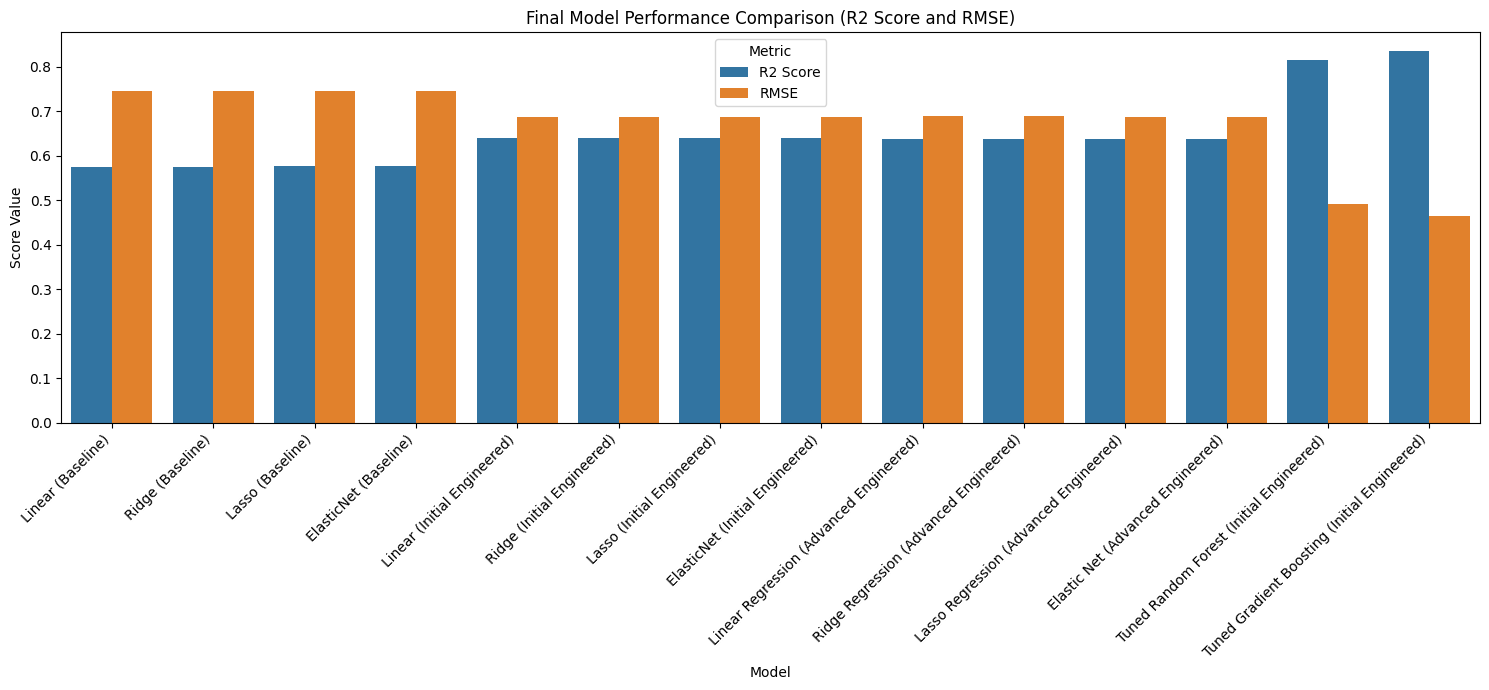

In [64]:
# Reshape the data for grouped bar plot, including non-linear models
final_results_melted = final_results_df_nonlinear.melt(id_vars='Model', var_name='Metric', value_name='Score')

plt.figure(figsize=(15, 7))
sns.barplot(x='Model', y='Score', hue='Metric', data=final_results_melted)
plt.title('Final Model Performance Comparison (R2 Score and RMSE)')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Score Value')
plt.tight_layout()
plt.show()

##Analyze and Conclude

Let's analyze the final model performance comparison table and visualization to draw conclusions about our project.

**Analysis of Final Model Performance:**

The final comparison table and the bar chart clearly show the performance of all the models we trained:

1.  **Baseline Linear Models:** These models, trained on the original features, had the lowest R2 scores (around 0.57) and the highest RMSE values (around 0.745). This serves as our baseline performance.
2.  **Linear Models with Initial Engineered Features:** Adding the initial engineered features (`MedInc_HouseAge`, `AveRooms_AveOccup`, `Distance_from_center`) significantly improved the performance of the linear models. The R2 scores increased to around 0.64, and the RMSE values dropped to around 0.687. This demonstrates the power of well-chosen features.
3.  **Linear Models with Advanced Engineered Features:** The advanced feature engineering, despite refining the `HouseAge` binning and adding polynomial and spatial features, did not lead to further improvements with the linear models. The performance metrics were similar to, or slightly worse than, the models with initial engineered features. This suggests that these more complex features might not be well-utilized by simple linear models.
4.  **Tuned Non-linear Models with Initial Engineered Features:** The Tuned Random Forest and Tuned Gradient Boosting models, trained on the *initial* engineered features, achieved the best performance by a significant margin.
    *   **Tuned Random Forest:** R2 of approximately **0.816** and RMSE of approximately **0.491**.
    *   **Tuned Gradient Boosting:** R2 of approximately **0.836** and RMSE of approximately **0.464**.

**Conclusion:**

This project demonstrates a clear progression in model performance through feature engineering and the selection of appropriate models.

*   **Feature Engineering is Crucial:** The initial feature engineering step provided a substantial boost in performance for the linear models, highlighting the importance of domain knowledge and data transformation.
*   **Non-linear Models Excel:** For this dataset, non-linear models like Random Forest and Gradient Boosting were far more effective than linear models, even those with engineered features. This indicates that the underlying relationships in the California Housing dataset are likely non-linear and complex.
*   **Gradient Boosting is the Winner:** Among all the models tested, the **Tuned Gradient Boosting Regressor trained on the initial engineered features** achieved the best performance, with the highest R2 score and the lowest RMSE. This model is the most capable of predicting the median house values in this dataset based on our exploration.

This project successfully showcased how combining feature engineering with powerful non-linear models and hyperparameter tuning can lead to significant improvements in predictive accuracy for a regression task.